# Unconstrained optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x,y):
    return (x+y)/(3+x**2 + y**2 + x*y)

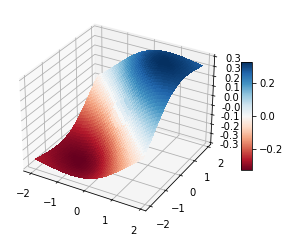

In [3]:
#Plot of the function
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from matplotlib import cm
import pylab

x=np.arange(-2,2, 0.1)
y=np.arange(-2,2, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= f(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

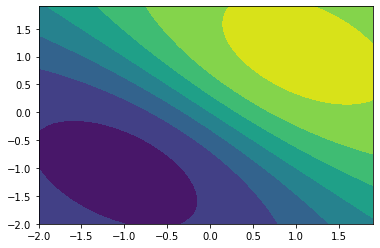

In [4]:
fig, ax = plt.subplots()
ax.contourf(X, Y, Z)

plt.show()

Note that the function is not convex, and may therefore attain different maximum and minimum values. 

In [5]:
def q(x,y):
    3+x**2 + y**2 + x*y

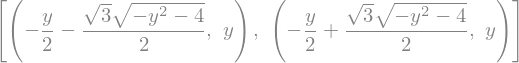

In [6]:
import sympy as sym
sym.init_printing()
x,y = sym.symbols('x,y')
g = sym.Eq(3+x**2 + y**2 + x*y,0)
sym.solve([g],(x,y))

There are no real points where the function attains infinite values, therefore it is continuous along the whole 2D plane. In other words, we are treating with a continuouss function. 

In [7]:
f(-2,2)

In [9]:
def grad(x,y):
    x_comp = 1/q(x,y) - (x+y)*(2*x+y)/q(x,y)
    y_comp = 1/q(x,y) - (x+y)*(2*y+x)/q(x,y)
    
    return np.array([x_comp, y_comp])

In [11]:
from scipy.optimize import fsolve

#x, y =  fsolve([x**2 + 2*x*y - 3,y**2 + 2*x*y - 3], (1, 1))
#print(x,y)

In [12]:
#gradient = grad(x,y)

#sym.nsolve([x**2 + 2*x*y - 3,y**2 + 2*x*y - 3], [x, y], [1, 1])




In [13]:
from sympy import *

x, y = symbols('x, y')
eq1 = Eq(x**2 + 2*x*y - 3, 0)
eq2 = Eq(y**2 + 2*x*y - 3, 0)

sol = solve([eq1, eq2], [x, y])

print(sol)

[(-1, -1), (1, 1), (-sqrt(3)*I, sqrt(3)*I), (sqrt(3)*I, -sqrt(3)*I)]


In [14]:
def hess(x,y):
    hessian = np.zeros((2,2))
    hessian[0,0] = 2*(x**3 + 3*y*x**2 - 9*x - y**3 - 6*y)/(3+x**2 + y**2 + x*y)**3
    hessian[0,1] = 6*(x*y**2 + (x**2-2)*y - 2*x )/(3+x**2 + y**2 + x*y)**3
    hessian[1,0] = 2*(y**3 + 3*x*y**2 - 9*y - x**3 - 6*x)/(3+x**2 + y**2 + x*y)**3
    hessian[1,1] = 6*(y*x**2 + (y**2-2)*x - 2*y )/(3+x**2 + y**2 + x*y)**3
    
    return hessian
    

In [15]:
hess(1,1)

array([[-0.11111111, -0.05555556],
       [-0.11111111, -0.05555556]])

In [16]:
np.linalg.eig(hess(1,1))

(array([-0.16666667,  0.        ]),
 array([[-0.70710678,  0.4472136 ],
        [-0.70710678, -0.89442719]]))

In [17]:
hess(-1,-1)

array([[0.11111111, 0.05555556],
       [0.11111111, 0.05555556]])

In [18]:
np.linalg.eig(hess(-1,-1))

(array([0.16666667, 0.        ]),
 array([[ 0.70710678, -0.4472136 ],
        [ 0.70710678,  0.89442719]]))

# Problem 7: Nash equilibrium

In [20]:
(41-3)*20

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x,y):
    return (98-x-y)*x

def f2(x,y):
    return (97-x-y)*y

print(f1(33,32))
print(f2(33, 32))

1089
1024


In [53]:
print(f1(34, 31))
print(f2(34, 31))
print(f1(34, 31)+ f2(34, 31))
print(f1(31, 33))
print(f2(31, 33))
print(f1(31, 33)+ f2(31, 33))
print(f1(37, 30))
print(f2(37, 30))
print(f1(37, 30)+ f2(37, 30))
print(f1(29, 34))
print(f2(29, 34))
print(f1(29, 34)+ f2(29, 34))

1122
992
2114
1054
1089
2143
1147
900
2047
1015
1156
2171


In [57]:
print(97 - 2*48)
print(2*98 -97)
print(99-66)

1
99
33


1089
1024


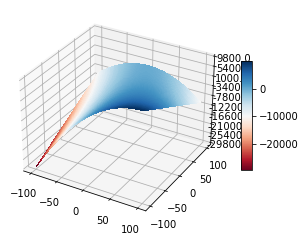

In [38]:
x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)

def f1(x,y):
    return (98-x-y)*x

def f2(x,y):
    return (97-x-y)*y

print(f1(33,32))
print(f2(33, 32))

X, Y = pylab.meshgrid(x,y)
Z= f1(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

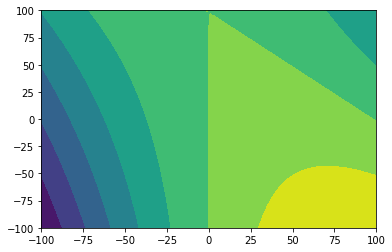

In [39]:
## x profit

fig, ax = plt.subplots()
ax.contourf(X, Y, Z)

plt.show()

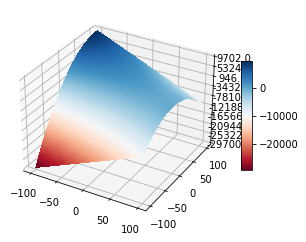

In [40]:
x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)


X, Y = pylab.meshgrid(x,y)
Z= f2(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf2 = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.colorbar(surf2, shrink=0.5, aspect=10)
#fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

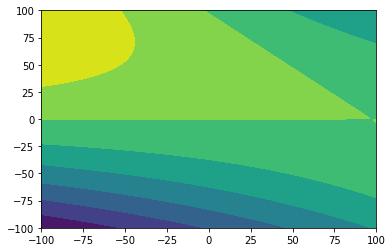

In [41]:
## y profit

fig, ax = plt.subplots()
ax.contourf(X, Y, Z)

plt.show()

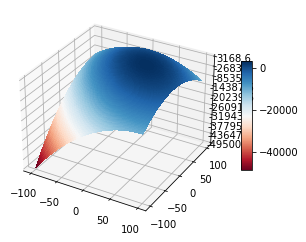

In [43]:
## Strategy of maximize their conjunt profit

def prof1(x,y):
    return 98*x + 97*y - x**2 - y**2 - x*y


x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)


X, Y = pylab.meshgrid(x,y)
Z= prof1(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()


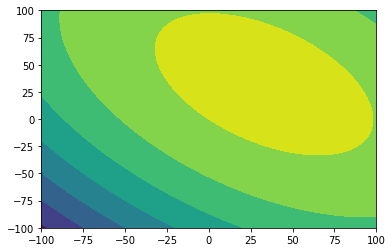

In [44]:
## x profit

fig, ax = plt.subplots()
ax.contourf(X, Y, Z)

plt.show()

In [63]:
def prof1(x,y):
    return 98*x + 97*y - x**2 - y**2 - x*y

print(prof1(1, 48))
print(prof1(33,32)/2)

def f1(x,y):
    return (98-x-y)*x

def f2(x,y):
    return (97-x-y)*y

print(f1(33,32))
print(f2(33,32))

2401
1584.5
1089
1024


In [69]:
print(prof1(33, 32))
print(prof1(33, 33))
print(prof1(34, 34))
print(prof1(32,32))

3169
3168
3162
3168


In [72]:
98-2*(33+32)

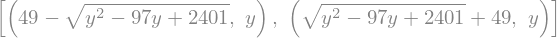

In [59]:
import sympy as sym
sym.init_printing()
x,y = sym.symbols('x,y')
g = sym.Eq(98*x-x**2 + y**2 - 97*y,0)
sym.solve([g],(x,y))

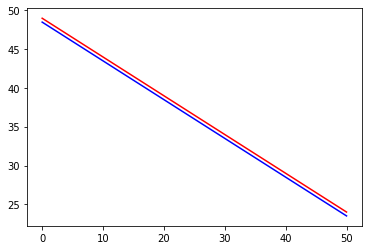

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# We want to maximize both functions: 

def f1(x):
    return (98-x)/2

def f2(x):
    return (97-x)/2

x = np.linspace(0, 50, 100)
#y = np.linspace(-200, 200, 100)

plt.plot(x, f1(x), color='red')
plt.plot(x, f2(x), color='blue')

plt.show()

In [62]:
49-97/4

In [64]:
49*4-97

In [65]:
97-33

In [26]:
## We also want to maximize the conjunt profit

def f1(x,y):
    return 

def f2(x):
    return (97-x)/2

x = np.linspace(0, 50, 100)
#y = np.linspace(-200, 200, 100)

plt.plot(x, f1(x), color='red')
plt.plot(x, f2(x), color='blue')

plt.show()